In [127]:
from tokenize import String
from textblob import TextBlob as tb
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer as Sia
from gensim.parsing.preprocessing import remove_stopwords
from pathlib import Path
from collections import defaultdict
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS 
import matplotlib.pyplot as plt

%matplotlib inline

nltk.download('vader_lexicon')
nltk.download('words')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gunin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\gunin\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Data

In [128]:
sia = Sia()
emoji_raw = pd.read_html("https://kt.ijs.si/data/Emoji_sentiment_ranking")
emoji_lookup_df = emoji_raw[0][['Char', 'Sentiment score[-1...+1]']]
emoji_lookup_df.rename(columns={'Sentiment score[-1...+1]': 'sentiment_score'}, inplace = True)


csv_path = Path("stockerbot-export.csv")
tweet_df = pd.read_csv(csv_path, error_bad_lines=False)



C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 731: expected 8 fields, saw 13\nSkipping line 2836: expected 8 fields, saw 15\nSkipping line 3058: expected 8 fields, saw 12\nSkipping line 3113: expected 8 fields, saw 12\nSkipping line 3194: expected 8 fields, saw 17\nSkipping line 3205: expected 8 fields, saw 17\nSkipping line 3255: expected 8 fields, saw 17\nSkipping line 3520: expected 8 fields, saw 17\nSkipping line 4078: expected 8 field

## Funnction definitions

In [180]:
def clean_text(input_str: str) -> str:
    input_str = input_str.lower()
    input_str = re.sub("[^A-Za-z0-9]"," ",input_str)
    input_str = re.sub(r'^https?:\/\/.*[\r\n]*', '', input_str, flags=re.MULTILINE)
    input_str = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', input_str)
    input_str = re.sub(r"www.\S+",'',input_str)
    input_str = remove_stopwords(input_str)
    return input_str

def get_tb_score(text: str) -> float:
    return tb(text).sentiment[0]

def get_nltk_score(text: str) -> float:
    return sia.polarity_scores(text)['compound']

def build_sentiment_df(tweet_dataframe, target_column):
    # getting the corresponding data in lists
    raw_tweets = tweet_dataframe[target_column].tolist()
    cleaned_tweets = [clean_text(i) for i in raw_tweets]
    tb_subjectivity = [tb(i).sentiment[1] for i in cleaned_tweets]
    nltk_polarity = [sia.polarity_scores(i)['compound'] for i in cleaned_tweets]
    
    # building the dataframe
    final_df = pd.DataFrame()
    final_df['tweets'] = raw_tweets
    final_df['cleaned_tweets'] = cleaned_tweets
    final_df['textblob_subjectivity'] = tb_subjectivity
    final_df['nltk_polarity'] = nltk_polarity

    final_df = final_df[final_df['tweets'].apply(lambda x: len(x.split(',')) < 280)]
    final_df = final_df.drop_duplicates()
    final_df = final_df[final_df['tweets'].str.contains("RT ") == False] 

    return final_df

def get_emoji_count(tweet_df):
    emoji_count = defaultdict(int)
    for i in tweet_df['tweets']:
        for emoji in re.findall(u'[\U0001f300-\U0001f650]', i):
            emoji_count[emoji] += 1

    return emoji_count


In [194]:
refined_tweet_df = build_sentiment_df(tweet_df, 'text')
emoji_data = get_emoji_count(refined_tweet_df)


In [195]:
sort_count = sorted(emoji_data.items(), key=lambda x: x[1], reverse=True)
sort_count

[('💰', 420),
 ('🙌', 262),
 ('😍', 261),
 ('💸', 256),
 ('😊', 223),
 ('💎', 216),
 ('📈', 165),
 ('📉', 54),
 ('🔥', 54),
 ('🌕', 43),
 ('📢', 34),
 ('🎉', 32),
 ('💵', 21),
 ('👀', 18),
 ('👍', 18),
 ('🌑', 18),
 ('😂', 18),
 ('👇', 15),
 ('😎', 12),
 ('📣', 12),
 ('🔹', 11),
 ('💕', 11),
 ('🏻', 10),
 ('😉', 9),
 ('💼', 7),
 ('💳', 7),
 ('🕘', 6),
 ('🔔', 6),
 ('💪', 5),
 ('👈', 5),
 ('🙄', 5),
 ('😘', 5),
 ('🔰', 5),
 ('💲', 4),
 ('🍾', 4),
 ('💯', 4),
 ('🏼', 4),
 ('🐂', 4),
 ('😋', 4),
 ('🏽', 3),
 ('📊', 3),
 ('😀', 3),
 ('😳', 3),
 ('💥', 3),
 ('😜', 3),
 ('🔌', 2),
 ('🗣', 2),
 ('🎼', 2),
 ('🙏', 2),
 ('🕵', 2),
 ('😅', 2),
 ('👁', 2),
 ('😈', 2),
 ('👽', 2),
 ('🔐', 2),
 ('💩', 2),
 ('👉', 2),
 ('🌊', 2),
 ('👏', 2),
 ('😁', 2),
 ('🖐', 2),
 ('😝', 2),
 ('👙', 2),
 ('💜', 2),
 ('🌭', 2),
 ('😱', 2),
 ('🍑', 2),
 ('😄', 2),
 ('🗡', 1),
 ('🍪', 1),
 ('🐔', 1),
 ('😭', 1),
 ('🍕', 1),
 ('🍺', 1),
 ('👟', 1),
 ('💞', 1),
 ('💘', 1),
 ('🙆', 1),
 ('📅', 1),
 ('🎲', 1),
 ('📡', 1),
 ('🐻', 1),
 ('😆', 1),
 ('🔝', 1),
 ('🔍', 1),
 ('💛', 1),
 ('🎊', 1),
 ('😨', 1),
 (

In [196]:
emoji_sample = sort_count[0:20]
q = emoji_sample[6][0]

In [197]:
print(emoji_lookup_df.loc[emoji_lookup_df.Char == q, 'sentiment_score'])

Series([], Name: sentiment_score, dtype: float64)


In [198]:
def group_emojis(counts):
    pos_lst=[]
    neut_lst = []
    neg_lst=[]
    for emoji in counts:
        score = emoji_lookup_df.loc[emoji_lookup_df.Char == emoji[0], 'sentiment_score']
        if score.values < 0:
            neg_lst.append(emoji)
        elif score.values > 0 and score.values < 0.3:
            neut_lst.append(emoji)
        else:
            pos_lst.append(emoji)
    return pos_lst[0:5], neut_lst[0:5], neg_lst[0:5]

In [199]:
group_emojis(sort_count)

C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':


([('🙌', 262), ('😍', 261), ('😊', 223), ('💎', 216), ('📈', 165)],
 [('💰', 420), ('💸', 256), ('🔥', 54), ('👀', 18), ('😂', 18)],
 [('🔌', 2), ('💩', 2), ('😭', 1), ('😨', 1), ('😲', 1)])

In [200]:
ge1 = group_emojis(sort_count)[0]
ge2 = group_emojis(sort_count)[1]
ge3 = group_emojis(sort_count)[2]

pos_sample_df = pd.DataFrame(ge1)
neut_sample_df = pd.DataFrame(ge2)
neg_sample_df = pd.DataFrame(ge3)

C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  import sys
C:\Users\gunin\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':


In [201]:
pos_sample_df

,0,1
0,🙌,262
1,😍,261
2,😊,223
3,💎,216
4,📈,165


In [202]:
neut_sample_df

,0,1
0,💰,420
1,💸,256
2,🔥,54
3,👀,18
4,😂,18


In [203]:
neg_sample_df

,0,1
0,🔌,2
1,💩,2
2,😭,1
3,😨,1
4,😲,1


In [204]:
def get_samples(tweet_dataframe):
    sorted_df = tweet_dataframe.sort_values(by='nltk_polarity', ascending=False)
    top20 = sorted_df['cleaned_tweets'].head(50)
    bottom20 = sorted_df['cleaned_tweets'].tail(50)
    return {'positive sample': list(top20.values), 'negative sample': list(bottom20.values)}

samples = get_samples(build_sentiment_df(tweet_df, 'text'))
words = set(nltk.corpus.words.words())


for sample in samples['positive sample']:
    sample = " ".join(w for w in nltk.wordpunct_tokenize(sample) if w.lower() in words or not w.isalpha())
for sample in samples['negative sample']:
    sample = " ".join(w for w in nltk.wordpunct_tokenize(sample) if w.lower() in words or not w.isalpha())

# dont need this line of code
samples['negative sample'].pop(48)

samples['positive sample'] = " ".join(sample for sample in samples['positive sample'])
samples['negative sample'] = " ".join(sample for sample in samples['negative sample'])

samples


{'positive sample': 'yay got unbelievable sold 11th win row today congrats class amp coach brandonvanzee love buy high https t xxclmq8k4h freedom hustle work earn income wealth rich success millionaire goodlife future boss https t n0djjrdtlp project strong team lot work great future support recommend friends https t 45wywnomlp absolutely love app join robinhoodapp ll stock like aapl f s free sure https t 4mpjiervcs free share stock good pass refer friend 1 250 chance fb aapl jpm 1 200 chance https t otwggtq0j2 btc x great news gs new ceo embracing crypto good stuff coming ma driving momentum good guys winning best buy best buy today s cg episode takes look longevity big box retailer s success bby https t 5jwumr6ery good morning adding aryc great investment opportunity t miss beautiful run https t ph0ikrnkzh join robinhoodapp ll stock like aapl f s free sure use link free stock https t aqrlxnjnjp day day point spy spx qqq better safe amp risk free overly exposed right good luck traders 

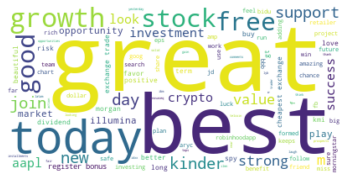

In [205]:
stopwords = set(STOPWORDS)
# add asset names and tickers to this list
stopwords.update(['https', 'http', 't', 's', 'll', 'mon'])

pos_wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(samples['positive sample'])
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

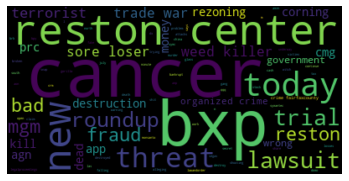

In [206]:
neg_wordcloud = WordCloud(stopwords=stopwords).generate(samples['negative sample'])
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='nltk_polarity', ylabel='textblob_subjectivity'>

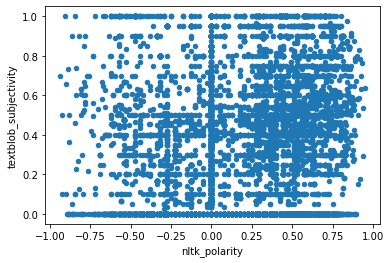

In [211]:
refined_tweet_df.plot.scatter('nltk_polarity', 'textblob_subjectivity')

In [210]:
refined_tweet_df[['nltk_polarity', 'textblob_subjectivity']].corr()

,nltk_polarity,textblob_subjectivity
nltk_polarity,1.000000,0.198259
textblob_subjectivity,0.198259,1.000000
